<a href="https://colab.research.google.com/github/itsbimaps14/SentimentAnalysisforCampaignProduct/blob/main/DataPreprocessing_UltraMilkxStrayKids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#!pip install ntscraper

In [8]:
#from ntscraper import Nitter

#scraper = Nitter(log_level=1)

In [9]:
#scraped_tweet = scraper.get_tweets("UltraMilkXStrayKids", mode='hashtag', number=100)

In [10]:
import os, sys
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/DATA_UM

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/DATA_UM


In [11]:
#save data to json

import json

#with open('result.json', 'w') as fp:
    #json.dump(scraped_tweet, fp)

In [12]:
# Load Json Data

with open('ultramilkxstraykids.json') as json_file:
    data = json.load(json_file)

tweet_data = data['tweets']

In [13]:
print(tweet_data[1]['stats'])

{'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 1}


In [14]:
import csv

#to csv
data_file = open('UltraMilkxStrayKids.csv', 'w')

# create the csv writer object
csv_writer = csv.writer(data_file)

# Counter variable used for writing
# headers to the CSV file
count = 0

for tweet in tweet_data:
    if count == 0:

        # Writing headers of CSV file
        header = tweet.keys()
        csv_writer.writerow(header)
        count += 1

    # Writing data of CSV file
    csv_writer.writerow(tweet.values())

data_file.close()

In [15]:
import pandas as pd

dframe = pd.read_csv('ultramilkxstraykids.csv')

print(dframe.text)

0       Btw, bakal ada premiere video #UltraMilkXStray...
1       Naik krl di pagi hari yg cerah, sambil ngeliat...
2       [🐣]  Wah pagi-pagi udah disambut @Stray_Kids d...
3       本日のウルトラミルクチャレンジは、 RASA KARAMEL=キャラメル味！  とっても甘く...
4       oh that's why they're holding the mocha flavor...
                              ...                        
1734    colab #UltraMilkXStrayKids bener2 yang ditungg...
1735    akhirnya yang ditunggu tunggu colab juga nih, ...
1736    gemes banget lihat oppa² stray kids minum ultr...
1737    wait wait ada apa nih #UltraMilkXStrayKids pas...
1738    wah keren banget nih colabnya, kan jadi pengen...
Name: text, Length: 1739, dtype: object


# **SECTION FOR DATA CLEANING**

In [16]:
import re

In [17]:
df_clean = dframe[['text']]

####1. Penghapusan Punctuations, Angka, Link Website, dan Hashtag

In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
# Before Remove Punctuation
#dframe.head(10)
df_clean.head(10)

,text
0,"Btw, bakal ada premiere video #UltraMilkXStray..."
1,"Naik krl di pagi hari yg cerah, sambil ngeliat..."
2,[🐣] Wah pagi-pagi udah disambut @Stray_Kids d...
3,本日のウルトラミルクチャレンジは、 RASA KARAMEL=キャラメル味！ とっても甘く...
4,oh that's why they're holding the mocha flavor...
5,-- #FELIX cut from Ultra Milk x Stray Kids 🔗...
6,우리 스키즈 🥳 #MakeYourMove #iamULTRAoddinary #Ult...
7,Finally i got unskippable ads... 😍😍 @ultramy...
8,우리 스키즈 🥳 I love ULTRAMILK 🩷 #MakeYourMove #ia...
9,dapet iklan #UltraMilkXStrayKids mana bisa dis...


In [20]:
def remove_punct(text):
    # Remove hashtag dan @
    ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    # Remove punctiation
    text  = "".join([char for char in text if char not in string.punctuation])
    # Remove angka
    text = re.sub('[0-9]+', '', text)
    # Remove website link
    text = re.sub(r'http\S+', '', text)

    return text

df_clean['text_punt'] = df_clean['text'].apply(lambda x: remove_punct(x))
df_clean.head(10)

<ipython-input-20-22b4ddc9b774>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_punt'] = df_clean['text'].apply(lambda x: remove_punct(x))


,text,text_punt
0,"Btw, bakal ada premiere video #UltraMilkXStray...",Btw bakal ada premiere video UltraMilkXStrayKi...
1,"Naik krl di pagi hari yg cerah, sambil ngeliat...",Naik krl di pagi hari yg cerah sambil ngeliati...
2,[🐣] Wah pagi-pagi udah disambut @Stray_Kids d...,🐣 Wah pagipagi udah disambut StrayKids di Sar...
3,本日のウルトラミルクチャレンジは、 RASA KARAMEL=キャラメル味！ とっても甘く...,本日のウルトラミルクチャレンジは、 RASA KARAMELキャラメル味！ とっても甘くて...
4,oh that's why they're holding the mocha flavor...,oh thats why theyre holding the mocha flavored...
5,-- #FELIX cut from Ultra Milk x Stray Kids 🔗...,FELIX cut from Ultra Milk x Stray Kids 🔗 Ul...
6,우리 스키즈 🥳 #MakeYourMove #iamULTRAoddinary #Ult...,우리 스키즈 🥳 MakeYourMove iamULTRAoddinary UltraM...
7,Finally i got unskippable ads... 😍😍 @ultramy...,Finally i got unskippable ads 😍😍 ultramym St...
8,우리 스키즈 🥳 I love ULTRAMILK 🩷 #MakeYourMove #ia...,우리 스키즈 🥳 I love ULTRAMILK 🩷 MakeYourMove iamU...
9,dapet iklan #UltraMilkXStrayKids mana bisa dis...,dapet iklan UltraMilkXStrayKids mana bisa disk...


#### 2. Remove Stopwords

In [21]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [22]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [23]:
# Indonesian Stopword by Sastrawi
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [24]:
def remove_stopwords(text):
    text = stopword.remove(text)
    return text

df_clean['text_stop'] = df_clean['text_punt'].apply(lambda x: remove_stopwords(x))
df_clean.head(10)

<ipython-input-24-ee2729099c0e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_stop'] = df_clean['text_punt'].apply(lambda x: remove_stopwords(x))


,text,text_punt,text_stop
0,"Btw, bakal ada premiere video #UltraMilkXStray...",Btw bakal ada premiere video UltraMilkXStrayKi...,Btw bakal premiere video UltraMilkXStrayKids b...
1,"Naik krl di pagi hari yg cerah, sambil ngeliat...",Naik krl di pagi hari yg cerah sambil ngeliati...,Naik krl pagi hari yg cerah ngeliatin barudak ...
2,[🐣] Wah pagi-pagi udah disambut @Stray_Kids d...,🐣 Wah pagipagi udah disambut StrayKids di Sar...,🐣 Wah pagipagi udah disambut StrayKids Sarina...
3,本日のウルトラミルクチャレンジは、 RASA KARAMEL=キャラメル味！ とっても甘く...,本日のウルトラミルクチャレンジは、 RASA KARAMELキャラメル味！ とっても甘くて...,本日のウルトラミルクチャレンジは、 RASA KARAMELキャラメル味！ とっても甘くて...
4,oh that's why they're holding the mocha flavor...,oh thats why theyre holding the mocha flavored...,thats why theyre holding the mocha flavored on...
5,-- #FELIX cut from Ultra Milk x Stray Kids 🔗...,FELIX cut from Ultra Milk x Stray Kids 🔗 Ul...,FELIX cut from Ultra Milk x Stray Kids 🔗 Ul...
6,우리 스키즈 🥳 #MakeYourMove #iamULTRAoddinary #Ult...,우리 스키즈 🥳 MakeYourMove iamULTRAoddinary UltraM...,우리 스키즈 🥳 MakeYourMove iamULTRAoddinary UltraM...
7,Finally i got unskippable ads... 😍😍 @ultramy...,Finally i got unskippable ads 😍😍 ultramym St...,Finally i got unskippable ads 😍😍 ultramym St...
8,우리 스키즈 🥳 I love ULTRAMILK 🩷 #MakeYourMove #ia...,우리 스키즈 🥳 I love ULTRAMILK 🩷 MakeYourMove iamU...,우리 스키즈 🥳 I love ULTRAMILK 🩷 MakeYourMove iamU...
9,dapet iklan #UltraMilkXStrayKids mana bisa dis...,dapet iklan UltraMilkXStrayKids mana bisa disk...,dapet iklan UltraMilkXStrayKids mana diskip 🤣🫶🏻


####3. Stemming Sentence

In [25]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [26]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [27]:
def stemming_sentence(text):
    text = stemmer.stem(text)
    return text

df_clean['text_stemming'] = df_clean['text_stop'].apply(lambda x: stemming_sentence(x))
df_clean.head(10)

<ipython-input-27-8a3e9041785f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_stemming'] = df_clean['text_stop'].apply(lambda x: stemming_sentence(x))


,text,text_punt,text_stop,text_stemming
0,"Btw, bakal ada premiere video #UltraMilkXStray...",Btw bakal ada premiere video UltraMilkXStrayKi...,Btw bakal premiere video UltraMilkXStrayKids b...,btw bakal premiere video ultramilkxstraykids b...
1,"Naik krl di pagi hari yg cerah, sambil ngeliat...",Naik krl di pagi hari yg cerah sambil ngeliati...,Naik krl pagi hari yg cerah ngeliatin barudak ...,naik krl pagi hari yg cerah ngeliatin barudak ...
2,[🐣] Wah pagi-pagi udah disambut @Stray_Kids d...,🐣 Wah pagipagi udah disambut StrayKids di Sar...,🐣 Wah pagipagi udah disambut StrayKids Sarina...,wah pagipagi udah sambut straykids sarinah ran...
3,本日のウルトラミルクチャレンジは、 RASA KARAMEL=キャラメル味！ とっても甘く...,本日のウルトラミルクチャレンジは、 RASA KARAMELキャラメル味！ とっても甘くて...,本日のウルトラミルクチャレンジは、 RASA KARAMELキャラメル味！ とっても甘くて...,rasa karamel im japanese living in indonesia i...
4,oh that's why they're holding the mocha flavor...,oh thats why theyre holding the mocha flavored...,thats why theyre holding the mocha flavored on...,thats why theyre holding the mocha flavored on...
5,-- #FELIX cut from Ultra Milk x Stray Kids 🔗...,FELIX cut from Ultra Milk x Stray Kids 🔗 Ul...,FELIX cut from Ultra Milk x Stray Kids 🔗 Ul...,felix cut from ultra milk x stray kids ultrami...
6,우리 스키즈 🥳 #MakeYourMove #iamULTRAoddinary #Ult...,우리 스키즈 🥳 MakeYourMove iamULTRAoddinary UltraM...,우리 스키즈 🥳 MakeYourMove iamULTRAoddinary UltraM...,makeyourmove iamultraoddinary ultramilkxstrayk...
7,Finally i got unskippable ads... 😍😍 @ultramy...,Finally i got unskippable ads 😍😍 ultramym St...,Finally i got unskippable ads 😍😍 ultramym St...,finally i got unskippable ads ultramym strayki...
8,우리 스키즈 🥳 I love ULTRAMILK 🩷 #MakeYourMove #ia...,우리 스키즈 🥳 I love ULTRAMILK 🩷 MakeYourMove iamU...,우리 스키즈 🥳 I love ULTRAMILK 🩷 MakeYourMove iamU...,i love ultramilk makeyourmove iamultraoddinary...
9,dapet iklan #UltraMilkXStrayKids mana bisa dis...,dapet iklan UltraMilkXStrayKids mana bisa disk...,dapet iklan UltraMilkXStrayKids mana diskip 🤣🫶🏻,dapet iklan ultramilkxstraykids mana skip


####4. Tokenization

In [28]:
!pip install nltk

In [29]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [30]:
from nltk.tokenize import word_tokenize

In [31]:
def tokenization(text):
    word_token = word_tokenize(text)
    return word_token

df_clean['text_token'] = df_clean['text_stemming'].apply(lambda x: tokenization(x.lower()))
df_clean.head(10)

,text,text_punt,text_stop,text_stemming,text_token
0,"Btw, bakal ada premiere video #UltraMilkXStray...",Btw bakal ada premiere video UltraMilkXStrayKi...,Btw bakal premiere video UltraMilkXStrayKids b...,btw bakal premiere video ultramilkxstraykids b...,"[btw, bakal, premiere, video, ultramilkxstrayk..."
1,"Naik krl di pagi hari yg cerah, sambil ngeliat...",Naik krl di pagi hari yg cerah sambil ngeliati...,Naik krl pagi hari yg cerah ngeliatin barudak ...,naik krl pagi hari yg cerah ngeliatin barudak ...,"[naik, krl, pagi, hari, yg, cerah, ngeliatin, ..."
2,[🐣] Wah pagi-pagi udah disambut @Stray_Kids d...,🐣 Wah pagipagi udah disambut StrayKids di Sar...,🐣 Wah pagipagi udah disambut StrayKids Sarina...,wah pagipagi udah sambut straykids sarinah ran...,"[wah, pagipagi, udah, sambut, straykids, sarin..."
3,本日のウルトラミルクチャレンジは、 RASA KARAMEL=キャラメル味！ とっても甘く...,本日のウルトラミルクチャレンジは、 RASA KARAMELキャラメル味！ とっても甘くて...,本日のウルトラミルクチャレンジは、 RASA KARAMELキャラメル味！ とっても甘くて...,rasa karamel im japanese living in indonesia i...,"[rasa, karamel, im, japanese, living, in, indo..."
4,oh that's why they're holding the mocha flavor...,oh thats why theyre holding the mocha flavored...,thats why theyre holding the mocha flavored on...,thats why theyre holding the mocha flavored on...,"[thats, why, theyre, holding, the, mocha, flav..."
5,-- #FELIX cut from Ultra Milk x Stray Kids 🔗...,FELIX cut from Ultra Milk x Stray Kids 🔗 Ul...,FELIX cut from Ultra Milk x Stray Kids 🔗 Ul...,felix cut from ultra milk x stray kids ultrami...,"[felix, cut, from, ultra, milk, x, stray, kids..."
6,우리 스키즈 🥳 #MakeYourMove #iamULTRAoddinary #Ult...,우리 스키즈 🥳 MakeYourMove iamULTRAoddinary UltraM...,우리 스키즈 🥳 MakeYourMove iamULTRAoddinary UltraM...,makeyourmove iamultraoddinary ultramilkxstrayk...,"[makeyourmove, iamultraoddinary, ultramilkxstr..."
7,Finally i got unskippable ads... 😍😍 @ultramy...,Finally i got unskippable ads 😍😍 ultramym St...,Finally i got unskippable ads 😍😍 ultramym St...,finally i got unskippable ads ultramym strayki...,"[finally, i, got, unskippable, ads, ultramym, ..."
8,우리 스키즈 🥳 I love ULTRAMILK 🩷 #MakeYourMove #ia...,우리 스키즈 🥳 I love ULTRAMILK 🩷 MakeYourMove iamU...,우리 스키즈 🥳 I love ULTRAMILK 🩷 MakeYourMove iamU...,i love ultramilk makeyourmove iamultraoddinary...,"[i, love, ultramilk, makeyourmove, iamultraodd..."
9,dapet iklan #UltraMilkXStrayKids mana bisa dis...,dapet iklan UltraMilkXStrayKids mana bisa disk...,dapet iklan UltraMilkXStrayKids mana diskip 🤣🫶🏻,dapet iklan ultramilkxstraykids mana skip,"[dapet, iklan, ultramilkxstraykids, mana, skip]"


#### Save Data Checkpoint CSV

In [32]:
df_clean.to_csv('ultramilkxstraykids.csv', encoding='utf-8', index=False)

#### Word Cloud Generate

In [33]:
!pip install matplotlib
!pip install wordcloud

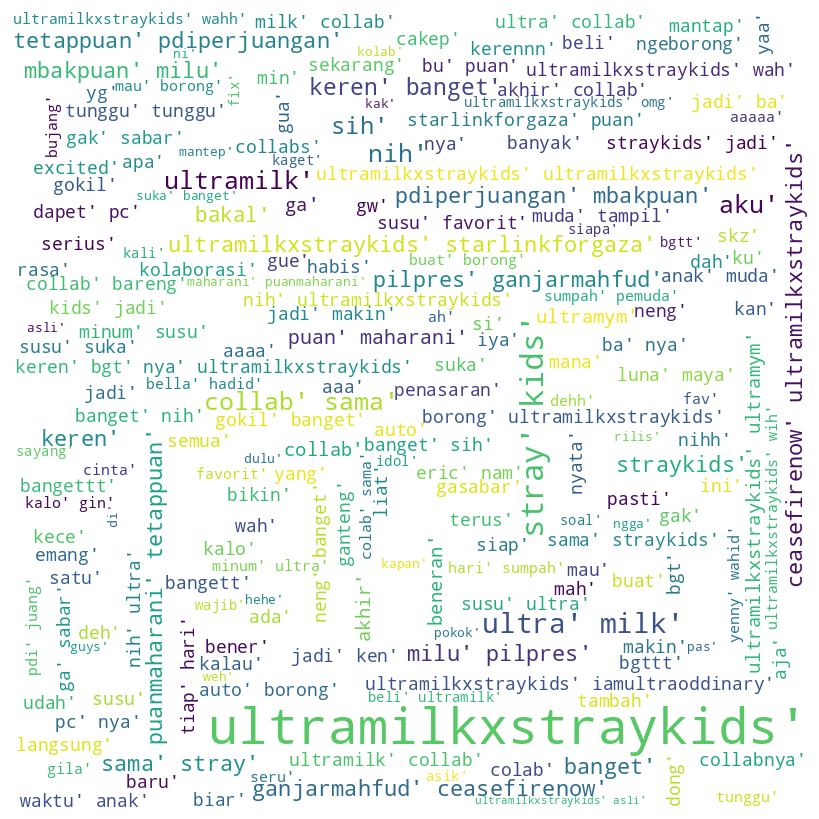

In [34]:
## GENERATE WORD CLOUD

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

df = df_clean.text_token

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#### Frequency Word Text

In [35]:
from nltk.probability import FreqDist
fdist = FreqDist()

In [36]:
for sentence in df_clean.text_token:
  #print(sentence)
  for word in sentence:
    #print(word)
    fdist[word] += 1

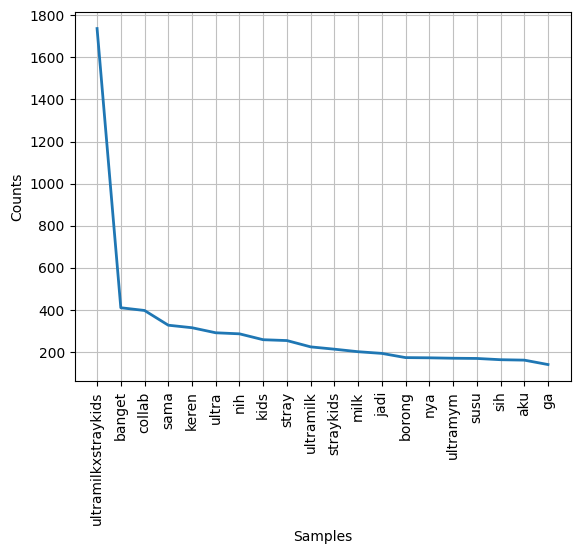

In [37]:
fdist.plot(20)
plt.show()